In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = iris.data[:,3]
y_vals = iris.data[:,0]

In [2]:
learning_rate = 0.01
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [4]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [5]:
loss_vec = []
for i in range(400):
    rand_index = np.random.choice(x_vals.shape[0], size=batch_size)
    #print(x_vals[rand_index,:].shape)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[ 2.17377067]]b = [[ 1.18226337]]
Loss = 4.95729
Step #50 A = [[ 2.5527153]]b = [[ 1.85015821]]
Loss = 1.97807
Step #75 A = [[ 2.52852988]]b = [[ 2.23237514]]
Loss = 1.2641
Step #100 A = [[ 2.39775801]]b = [[ 2.50000095]]
Loss = 1.77877
Step #125 A = [[ 2.22681999]]b = [[ 2.71625662]]
Loss = 2.08746
Step #150 A = [[ 2.08989692]]b = [[ 2.9091351]]
Loss = 1.58754
Step #175 A = [[ 1.97472155]]b = [[ 3.09194398]]
Loss = 1.2174
Step #200 A = [[ 1.87986469]]b = [[ 3.27651358]]
Loss = 0.972437
Step #225 A = [[ 1.77877057]]b = [[ 3.4450357]]
Loss = 1.00605
Step #250 A = [[ 1.68687439]]b = [[ 3.58584666]]
Loss = 0.671131
Step #275 A = [[ 1.61412227]]b = [[ 3.70021939]]
Loss = 0.645567
Step #300 A = [[ 1.52624512]]b = [[ 3.80101824]]
Loss = 0.324592
Step #325 A = [[ 1.46283209]]b = [[ 3.89718723]]
Loss = 0.517365
Step #350 A = [[ 1.41525936]]b = [[ 3.99605036]]
Loss = 0.442073
Step #375 A = [[ 1.36110651]]b = [[ 4.07048893]]
Loss = 0.285198
Step #400 A = [[ 1.32507777]]b = [[ 4.134

In [6]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

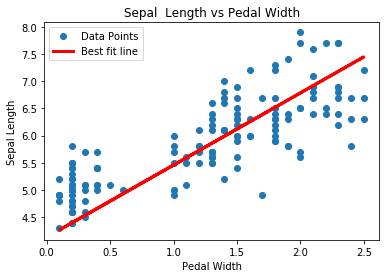

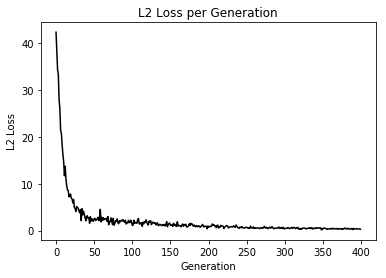

In [7]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal  Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()